In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples

In [ ]:
births = Table.read_table('data/baby.csv')

In [ ]:
births

In [ ]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [ ]:
smoking_and_birthweight.group('Maternal Smoker')

In [ ]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [ ]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

In [ ]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

# Random Permutation (Shuffling)

In [ ]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [ ]:
letters.sample()

In [ ]:
letters.sample(with_replacement = False)

In [ ]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

# Simulation Under Null Hypothesis

In [ ]:
smoking_and_birthweight

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [ ]:
original_and_shuffled

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

# Permutation Test

In [ ]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [ ]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [23]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


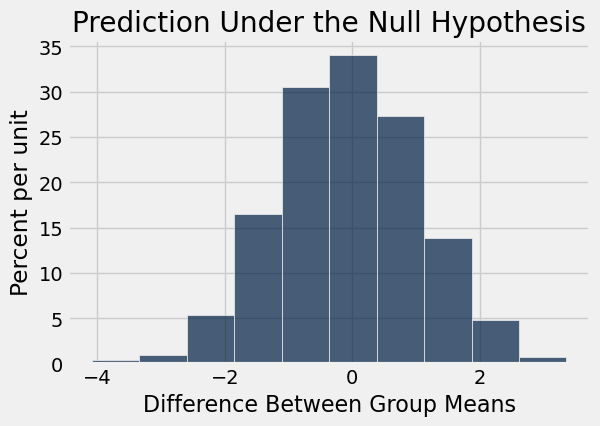

In [24]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');